# EX1. 

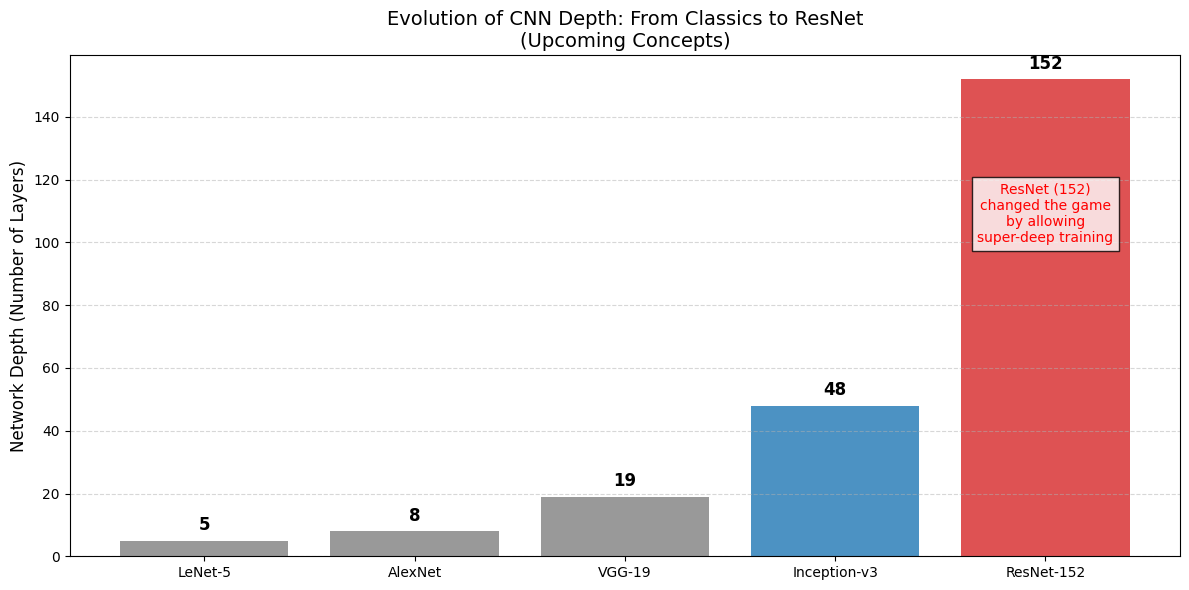

In [1]:
### Full Visualization Implementation
'''
This visualization illustrates the **evolution of network depth** mentioned in the transcript, 
comparing the "Classics" (LeNet, AlexNet) to the "Deep" networks (ResNet-152).
'''
import matplotlib.pyplot as plt
import numpy as np

def visualize_network_depths():
    # Data based on the architectures mentioned in the transcript
    networks = ['LeNet-5', 'AlexNet', 'VGG-19', 'Inception-v3', 'ResNet-152']
    
    # Approximate number of layers (depth)
    # LeNet-5 (5 layers), AlexNet (8 layers), VGG-19 (19 layers)
    # Inception (~48 layers), ResNet (152 layers)
    depths = [5, 8, 19, 48, 152]
    
    # Colors to distinguish "Classic" vs "Deep"
    colors = ['gray', 'gray', 'gray', 'tab:blue', 'tab:red']

    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create Bar Chart
    bars = ax.bar(networks, depths, color=colors, alpha=0.8)
    
    # Add labels
    ax.set_ylabel('Network Depth (Number of Layers)', fontsize=12)
    ax.set_title('Evolution of CNN Depth: From Classics to ResNet\n(Upcoming Concepts)', fontsize=14)
    
    # Annotate bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

    # Highlight ResNet
    ax.text(4, 100, "ResNet (152)\nchanged the game\nby allowing\nsuper-deep training", 
            ha='center', color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

visualize_network_depths()

# EX2

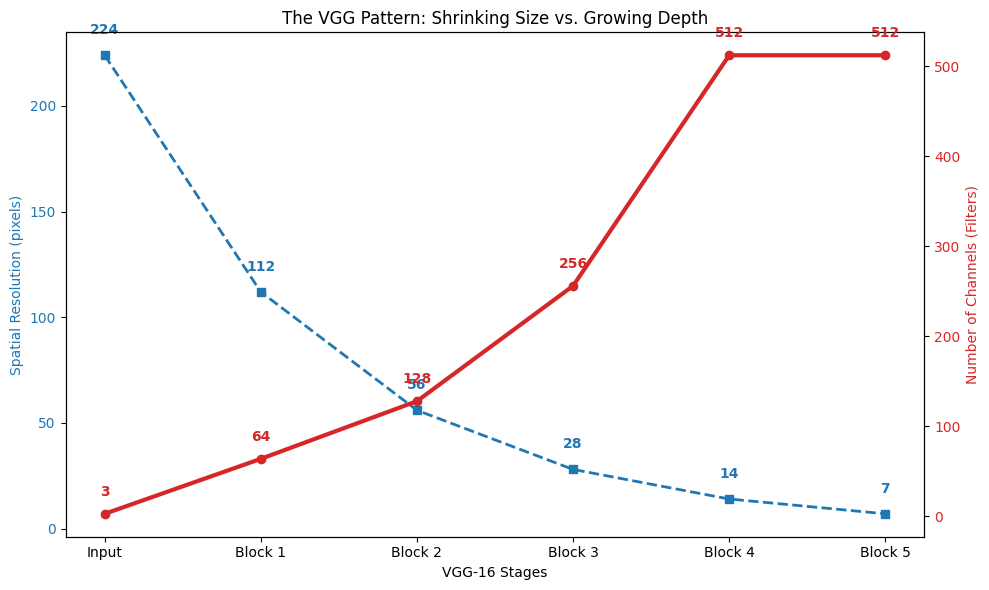

In [2]:
### Full Visualization Implementation
'''
This visualization plots the **"Doubling Pattern"** of VGG-16, contrasting the shrinking spatial resolution 
against the growing channel depth.
'''
import matplotlib.pyplot as plt
import numpy as np

def visualize_vgg16_pattern():
    # VGG-16 stages: Input -> Block1 -> Block2 -> Block3 -> Block4 -> Block5
    stages = ['Input', 'Block 1', 'Block 2', 'Block 3', 'Block 4', 'Block 5']
    
    # Spatial Dimensions (Height/Width) - Halves at each block
    # 224 -> 112 -> 56 -> 28 -> 14 -> 7
    spatial_dims = [224, 112, 56, 28, 14, 7]
    
    # Channel Depth - Doubles at each block (starting after block 1)
    # 3 -> 64 -> 128 -> 256 -> 512 -> 512
    channels = [3, 64, 128, 256, 512, 512]
    
    x = np.arange(len(stages))
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot Spatial Size
    color = 'tab:blue'
    ax1.set_xlabel('VGG-16 Stages')
    ax1.set_ylabel('Spatial Resolution (pixels)', color=color)
    ax1.plot(x, spatial_dims, color=color, marker='s', linestyle='--', linewidth=2, label='Height/Width')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(x)
    ax1.set_xticklabels(stages)
    
    # Annotate Spatial Values
    for i, v in enumerate(spatial_dims):
        ax1.text(i, v + 10, str(v), color=color, ha='center', fontweight='bold')

    # Create Twin Axis for Channels
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Number of Channels (Filters)', color=color)
    ax2.plot(x, channels, color=color, marker='o', linewidth=3, label='Channels')
    ax2.tick_params(axis='y', labelcolor=color)
    
    # Annotate Channel Values
    for i, v in enumerate(channels):
        ax2.text(i, v + 20, str(v), color=color, ha='center', fontweight='bold')
        
    plt.title("The VGG Pattern: Shrinking Size vs. Growing Depth")
    fig.tight_layout()
    plt.show()

visualize_vgg16_pattern()

# EX3

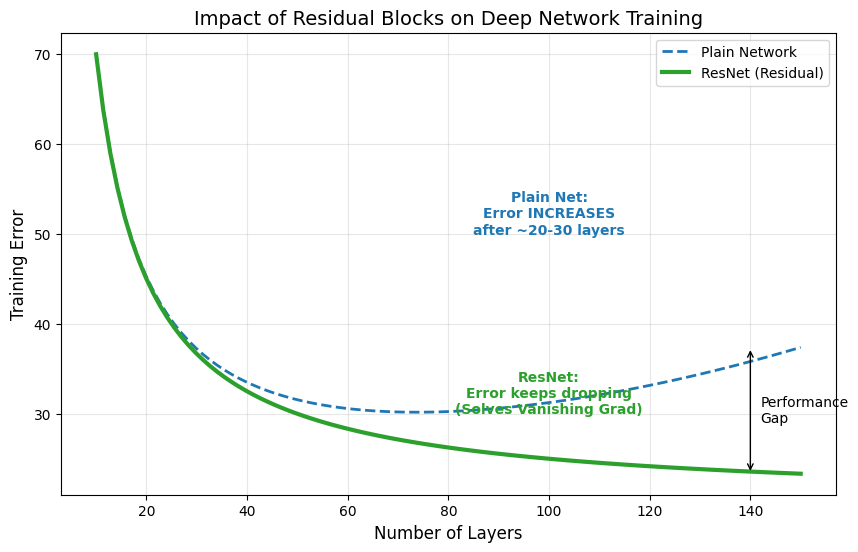

In [3]:
### Full Visualization Implementation
'''
This visualization reproduces the famous **"Training Error vs. Depth"** graph mentioned in the transcript.
It illustrates the fundamental difference between "Plain" networks (where error increases with depth) and "ResNets" 
(where error decreases).
'''

import matplotlib.pyplot as plt
import numpy as np

def visualize_resnet_vs_plain():
    # X-axis: Number of Layers
    layers = np.linspace(10, 150, 100)
    
    # Simulate "Plain" Network Error
    # Theory: Should go down. Reality: Goes down then UP due to vanishing gradients
    plain_error = 20 + 500/layers + (layers/40)**2 
    
    # Simulate "ResNet" Error
    # Reality: Continues to go down (or flatten) as layers increase
    resnet_error = 20 + 500/layers
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot Plain Net
    ax.plot(layers, plain_error, label='Plain Network', color='tab:blue', linewidth=2, linestyle='--')
    
    # Plot ResNet
    ax.plot(layers, resnet_error, label='ResNet (Residual)', color='tab:green', linewidth=3)
    
    # Annotations
    ax.set_xlabel('Number of Layers', fontsize=12)
    ax.set_ylabel('Training Error', fontsize=12)
    ax.set_title('Impact of Residual Blocks on Deep Network Training', fontsize=14)
    
    # Add text explaining the phenomenon
    ax.text(100, 30, "ResNet:\nError keeps dropping\n(Solves Vanishing Grad)", 
            color='tab:green', ha='center', fontweight='bold')
    
    ax.text(100, 50, "Plain Net:\nError INCREASES\nafter ~20-30 layers", 
            color='tab:blue', ha='center', fontweight='bold')

    # Draw arrow highlighting the gap
    ax.annotate('', xy=(140, resnet_error[-1]), xytext=(140, plain_error[-1]),
                arrowprops=dict(arrowstyle='<->', color='black'))
    ax.text(142, (resnet_error[-1] + plain_error[-1])/2, "Performance\nGap", va='center')

    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.show()

visualize_resnet_vs_plain()